In [45]:
from matplotlib import pyplot as plt
import sympy as sp
import numpy as np

def met_euler(f,x0,xn,y0,h):
    n=int((xn-x0)/h)
    x=np.linspace(x0,xn,n+1)
    y=np.linspace(x0,xn,n+1)
    y[0]=y0
    for i in range(n):
        y[i+1]=y[i]+h*f(x[i],y[i])
    return y

## Métodos numéricos

Cuando trabajamos con métodos numéricos en la resolución de ecuaciones diferenciales, el objetivo es encontrar un conjunto de valores que se aproximen una solución particular de la ecuación diferencial propuesta.

Existen diferentes algoritmos que permiten implementar estos métodos numéricos, algunos más certeros que otros, y por tanto es posible (en ocasiones) estimar el error y decidir qué método emplear en cada etapa de la busqueda de una buena aproximación de la solución.

## Método de Euler

Se utiliza para encontrar una aproximación de la solución al problema de valor inicial

$$ y'=f(x,y) \quad ; \quad y(x_0)=y_0 $$

el algoritmo asociado al método de Euler está dado por:

Para $i=0,1, ... , n-1$ realizar <br>
*    $ x_i = x_0+ih $ <br>
*    $y_{i+1}= y_i +h f(x_i , y_i) $ <br>
    
Fin

## Ejemplo 1

Considere el problema de valores iniciales 
$$ y'=\dfrac{y}{x}+x\mathrm{e}^{-\frac{y}{x}} \quad ; \quad y(1)=2,$$
* a) Utilice el método de Euler para encontrar una aproximación de $y(11)$ para el problema de valores iniciales utilizando $h=1$.
* b) Encuentre la solución del PVI realizando la sustitución $y=zx$. En un mismo gráfico trace la solución aproximada y la solución explícita al PVI.
* c) Calcule el error absoluto, luego justifique si es una buena aproximación ¿Cómo cree que se puede mejorar?

In [46]:
x=np.linspace(1,11,11)
y=np.linspace(1,11,11)

h=1

y[0]=2

n=(int(11-1/h))

for i in range(n):
    y[i+1]=y[i]+h*(y[i]/x[i]+x[i]*np.exp(-y[i]/x[i]))
y


array([ 2.        ,  4.13533528,  6.4559638 ,  8.9567102 , 11.62207214,
       14.43569017, 17.38271812, 20.45026675, 23.62729081, 26.90433723,
       30.273286  ])

1.1409655350608006
0.037688856608271364


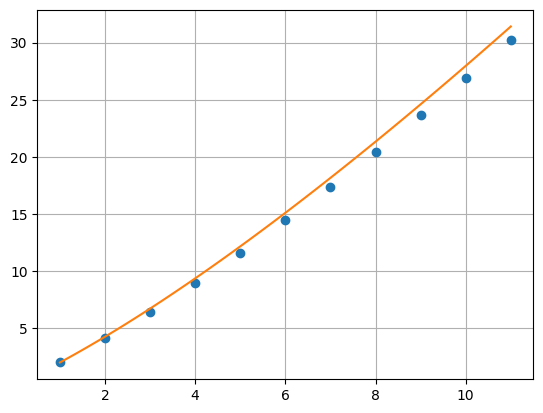

In [47]:
plt.plot(x,y,"o", label="aprox con met euler")
X=np.linspace(1,11,100)
yp=X*np.log(np.abs(X+np.exp(2)-1))
plt.plot(X,yp,label="solucion real")
plt.grid()
plt.legend

ERROR=np.abs(yp[-1]-y[-1])#error asoluto
Errorporcentual=ERROR/np.abs(y[-1])
print(ERROR)
print(Errorporcentual)

## Ejemplo 2

* a) Defina una función en Python que permita encontrar una aproximación de $y(x_n)$ para el problema de valores iniciales general

$$ y'(x)=f(x,y) \quad , \quad y(x_0)=y_0$$

dados los datos de entrada $f(x,y), x_0, x_n, y_0, n$ (o $h$ en su defecto)

* b) Utilice la función anterior para encontrar una aproximación de $y(11)$ al PVI del ejemplo 1

In [48]:
def f(x,y) : return 9.8-x**2
met_euler(f,0,1.1,10,0.1)



array([10.   , 10.98 , 11.959, 12.935, 13.906, 14.87 , 15.825, 16.769,
       17.7  , 18.616, 19.515, 20.395])

## Ejemplo 3

La EDO autónoma y de Riccati

$$m \frac{dy}{dt} = mg − ky^2$$

modela la velocidad $y(t)$ de un cuerpo de masa $m$ (en kg) que está cayendo bajo la influencia de la gravedad. Debido a que el término $–ky^2$ representa la resistencia del aire, la velocidad de un cuerpo que cae de una gran altura no aumenta sin límite conforme pasa el tiempo $t$.

Suponga que el cuerpo tiene masa 2 $[kg]$ y $k = 2$ donde $g = 9, 8 \left[ \frac{m}{s^2} \right]$ y que en el instante $t=0$ el cuerpo tiene velociadad $10 \left[ \frac{m}{s} \right]$.

* a) Usando el método de Euler, determine la velocidad del cuerpo al cabo de $10 [s]$, usando:
    * $h=0.1$
    * $n=300$

* b) Verifique que $y(t) = \dfrac{\sqrt{g} \sqrt{m} }{\sqrt{k}} \tanh\left[ \sqrt{g} \sqrt{k}\left( C \sqrt{m}+ \dfrac{t}{\sqrt{m}} \right) \right]$ es la solución general de la EDO.
* c) Calcule la solución particular que satisface la condición inicial.
* d) Calcule el error cometido en cada uno de las aproximaciones de a). Justifique cuál es una mejor aproximación.

# Ejercicio 1

Para el problema 
$$ y'=f(x,y) \quad ; \quad y(x_0)=y_0 $$

el algoritmo asociado al método RK4 está dado por:
    
Para $i=0,1, ... , n-1$ realizar <br>

*    $ x_i = x_0+ih $ <br>

*    $ K_1 = f(x_i,y_i) $ <br>

*    $ K_2 = f\left( x_i + \dfrac{h}{2} , y_i + \dfrac{h}{2} K_1 \right) $ <br>

*    $ K_3 = f\left( x_i + \dfrac{h}{2} , y_i + \dfrac{h}{2} K_2 \right) $ <br>

*    $ K_4 = f\left( x_i + h , y_i + h K_3 \right) $ <br>

*    $y_{i+1} = y_i + \dfrac{h}{6} \left[ K_1 + 2K_2 + 2K_3 + K_4 \right] $ <br>

Fin

* a) Defina una función en Python, llamada RK4, que permita encontrar una aproximación de $y(x_n)$ para el problema de valores iniciales general:

$$ y'(x)=f(x,y) \quad , \quad y(x_0)=y_0$$

cuyos datos es entrada serán $f(x,y), x_0, x_n, y_0, n$ (o $h$ en su defecto)

* b) Utilice la función anterior para encontrar las aproximaciónes de los ejemplos 1 y 3.

In [49]:
#taller del año pasado

#(1)

def p(x,y): return (np.exp(-x**2)*y)/(np.sin(y))
AP=met_euler(p,0,0.1,1,0.0001)
AP[-1]
len(AP)

ERROR=np.abs(1.1526002455776254-(AP[-1]))
ERROR
ERRORPORCENTUAL=(ERROR/1.1526002455776254)*100
ERRORPORCENTUAL




2.7285193591039745

In [50]:
#(2)

def metodo_biseccion(a,b,f,t=0.0000000001):
    while (np.abs(a-b)>=t):
        xi=(a+b)/2
        multi=f(a)*f(xi)
        if multi<0:
            b=xi
        else:
            if multi>0:
                a=xi
            else:
                if multi==0:
                    a=xi
                    b=xi
    return xi

r=5
lam=1/3
def h(x): return r*(1-np.cos(x)+(1/lam)*(1-np.sqrt(1-lam**2*np.sin(x)**2)))-8
metodo_biseccion(2,3,h)







2.0563144491170533

In [51]:
x = sp.Symbol("x", real=True)  # Utilizar X en lugar de x
r=5
lam=1/3
# Definir la función
F = r*(1-sp.cos(x)+(1/lam)*(1-sp.sqrt(1-lam**2*sp.sin(x)**2)))

# Calcular la derivada
fx=sp.simplify(sp.diff(F, x))

fxx=sp.simplify(sp.diff(sp.simplify(sp.diff(F, x)), x))

fx






5.0*sin(x) + 0.857492925712544*sin(2*x)/sqrt(0.0588235294117647*cos(2*x) + 1)

In [52]:
fxx

5.0*cos(x) + 1.66666666666667*cos(2*x)/sqrt(1 - 0.111111111111111*sin(x)**2) + 0.0462962962962963*sin(2*x)**2/(1 - 0.111111111111111*sin(x)**2)**(3/2)